<a href="https://colab.research.google.com/github/ramprabumithra/Titanic_visualization/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.value_counts('Survived').reset_index()

,Survived,count
0,0,549
1,1,342


REMOVING NULL VALUES FROM TABLE

In [33]:
df = df.dropna()
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping nulls: {len(df)}")
display(df.head())

Original number of rows: 183
Number of rows after dropping nulls: 183


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


VISUALISATION OF DATASET

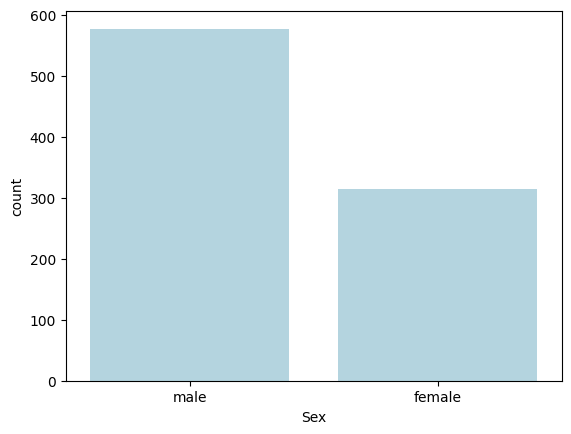

In [17]:
sns.countplot(x='Sex', data=df, color = 'lightblue')
plt.show()

According to the above histogram, there were close to 600 males and 300 females on the Titanic altogether.

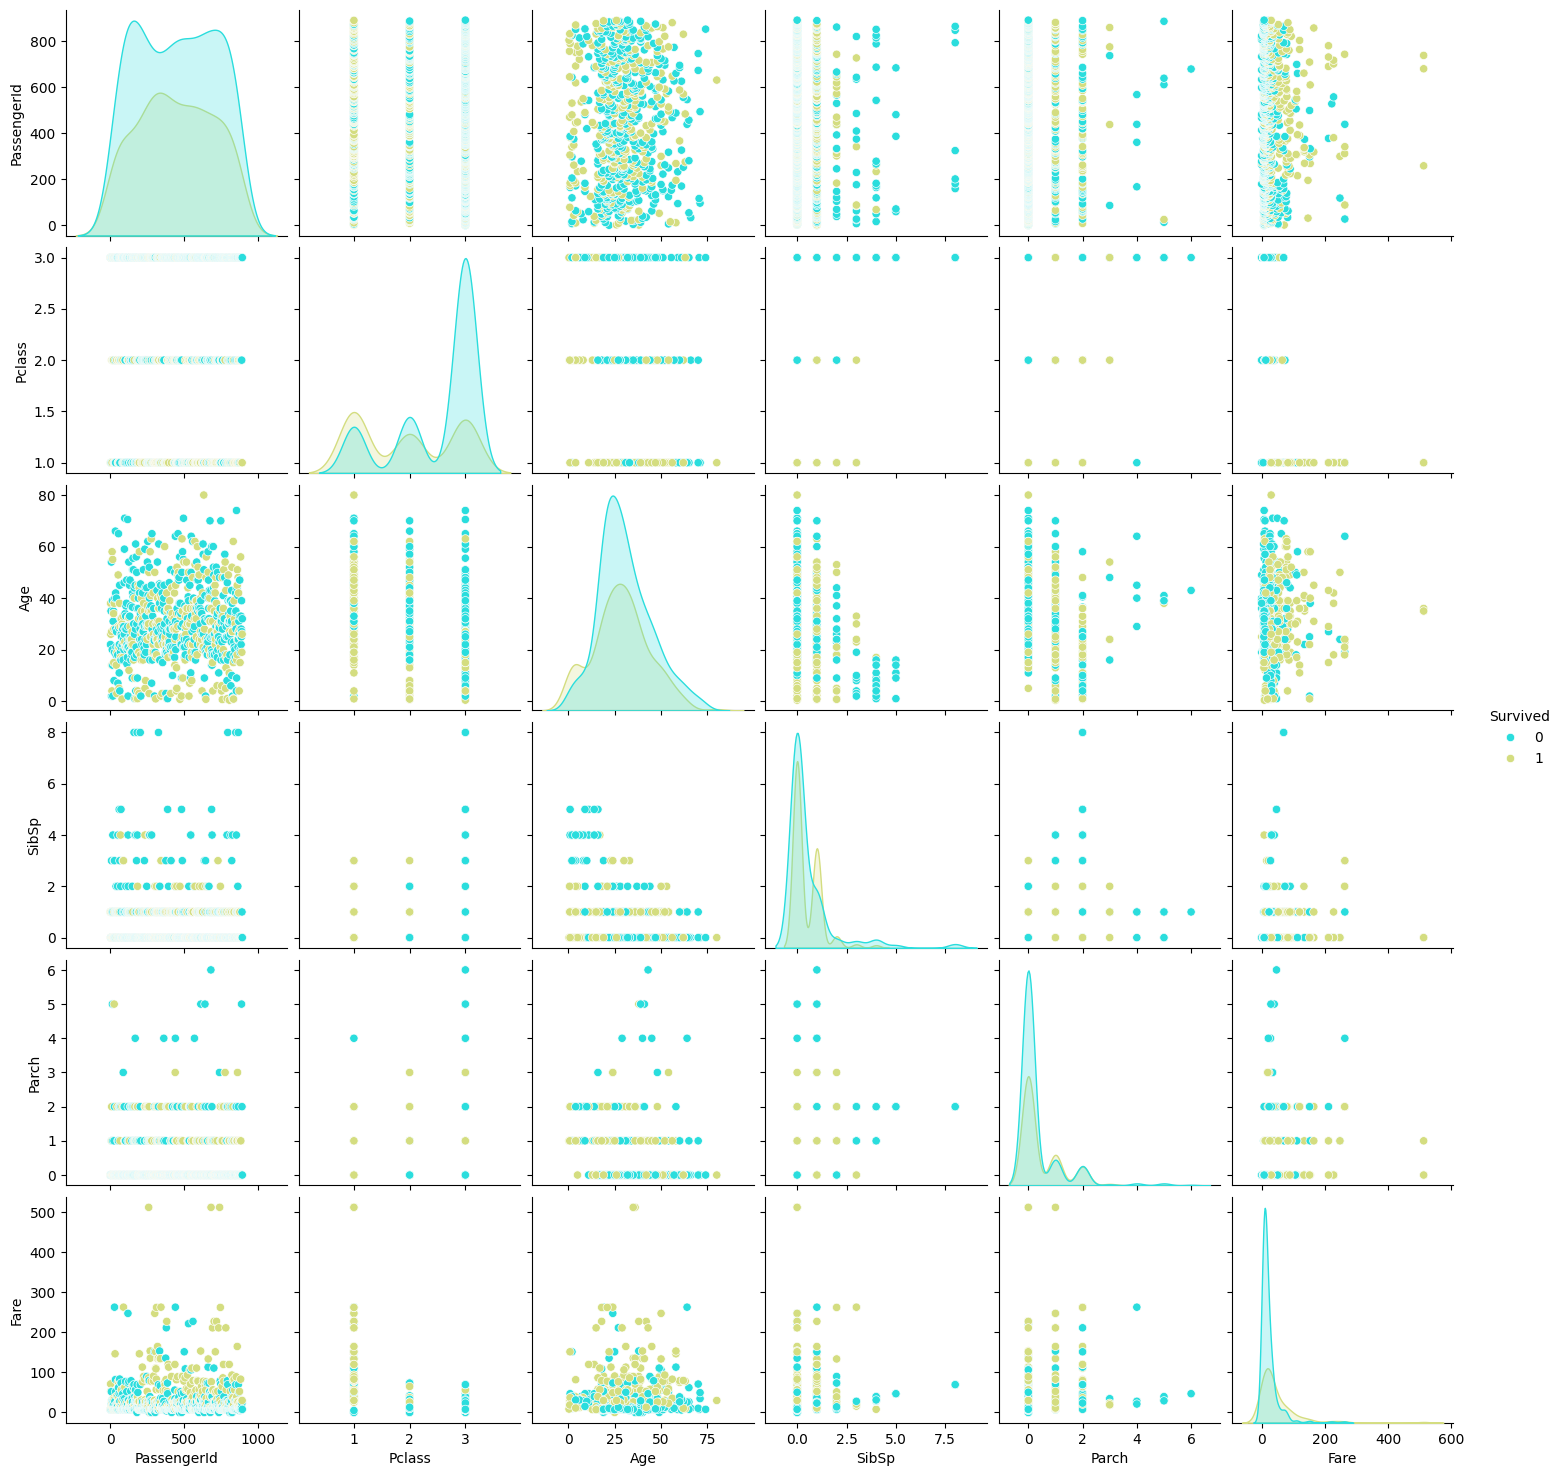

In [16]:
sns.pairplot(data = df, hue='Survived', palette = 'rainbow')
plt.show()

This Seaborn pairplot of the Titanic dataset compares passenger features and survival, with **yellow points representing survivors and cyan points representing non-survivors.**

**The diagonal plots show the distribution of each variable**: Pclass reveals more survivors in 1st class and more non-survivors in 3rd class, Age suggests higher survival among children, Fare indicates that passengers who paid higher fares had better survival rates, and SibSp and Parch show most people traveled alone, though small family groups had better survival odds.

**Off-diagonal scatterplots reveal relationships between variables**: Pclass and Fare are strongly related, with higher fares in 1st class and more survivors in that group; Age and Fare show older passengers often paid more in 1st class and survived more frequently; and SibSp and Parch suggest large family sizes had lower survival rates while small families fared better.

**Overall, higher class, higher fare, and being younger or part of a small family are visually associated with higher survival odds.**


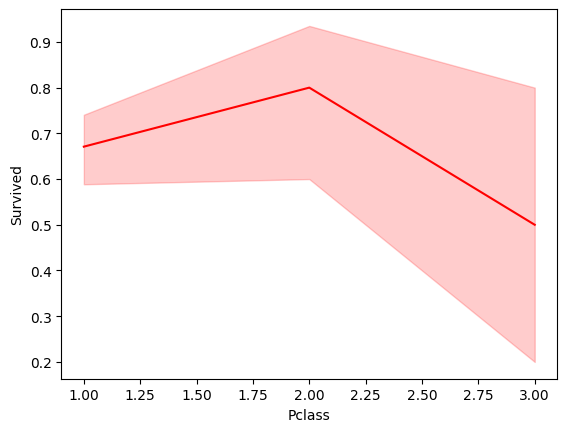

In [41]:
sns.lineplot(x='Pclass', y='Survived', data=df, color = 'red')
plt.show()

The above line plot shows the relationship between the class of a passenger and the rate of survival. It can be inferred that those in the second class had a higher rate of survival.

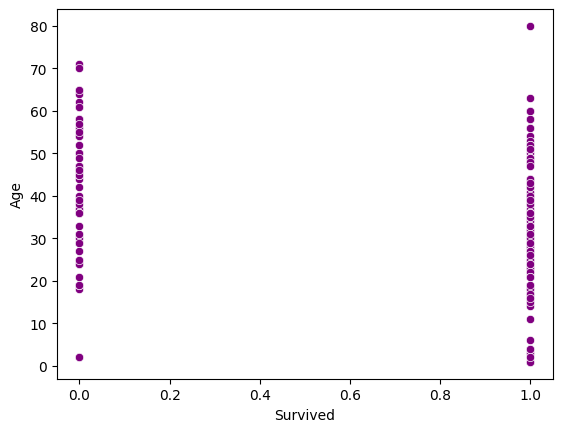

In [43]:
sns.scatterplot(x='Survived', y='Age', data=df, color = 'purple')
plt.show()

The above scatterplot indicates that most survivors were in a lower age range.

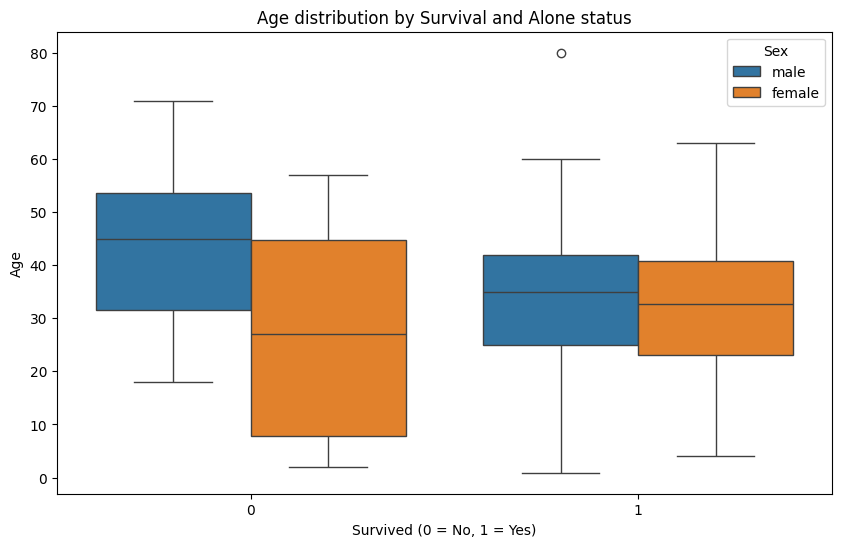

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', hue = 'Sex', data= df)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age distribution by Survival and Alone status')
plt.show()


**This boxplot shows the distribution of passenger ages on the Titanic, split by survival status (0 = did not survive, 1 = survived) and sex, providing insights into how age and gender related to survival outcomes.**

For non-survivors (0), males tended to be older on average, with a median age in the mid-40s, and had a broad spread from late teens to around 70, while females had a lower median age in the late 20s and a wider spread including many young children.

For survivors (1), both males and females generally had lower median ages than non-survivors, with male survivors’ ages clustered in the mid-30s and female survivors in the early 30s, though female survivors showed a fairly balanced distribution across all ages and fewer extreme values.

The plot also shows outliers, such as an older male survivor around age 80, indicating exceptions to general trends.

**Overall, it suggests that survival chances were higher for women and younger individuals, aligning with the “women and children first” evacuation pattern.**


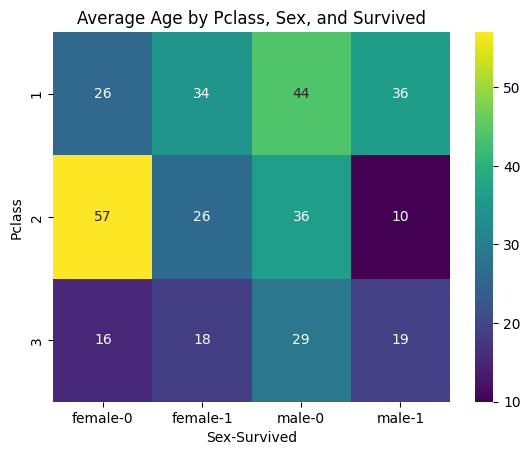

In [36]:
average_age = df.pivot_table(index='Pclass', columns=['Sex', 'Survived'], values='Age', aggfunc='mean')
sns.heatmap(data=average_age, annot=True, cmap='viridis')
plt.title('Average Age by Pclass, Sex, and Survived')
plt.show()

**This heatmap shows the average ages of Titanic passengers by class, sex, and survival, revealing that ages varied widely across groups.**

First-class passengers tended to be older, especially non-surviving males (44), while third-class passengers were generally younger, with many survivors in their teens or twenties.

Second-class non-surviving females had the highest average age (57), whereas surviving second-class males were the youngest (10), likely children.

**Overall, survival was often linked with being younger, female, and in a higher class.**
